# t-SNE 範例
* 觀察雙同心圓使用 t-SNE 不同 perplexity 的分群效果

In [1]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

------

#### perplexity : float, optional (default: 30)
The perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms. Larger datasets usually require a larger perplexity. Consider selecting a value between 5 and 50. The choice is not extremely critical since t-SNE is quite insensitive to this parameter.

------

red.shape=(300,), red=[False False False False False False  True False False  True False False
  True  True  True False False False False  True  True  True  True False
  True  True  True  True  True  True  True False False False  True False
  True  True False  True  True  True False  True False  True False False
 False  True False False  True  True  True  True  True  True  True  True
 False False  True False False  True False False False  True  True False
 False  True  True  True  True  True False False  True  True  True False
 False  True  True False  True False  True  True False False  True False
  True  True False False False  True  True  True False  True False False
 False  True False False False False False  True  True  True False  True
  True False  True  True  True False False False False False  True False
 False False  True  True  True False False  True  True False  True False
 False False False  True False  True  True  True False False  True False
  True  True False  True Fals

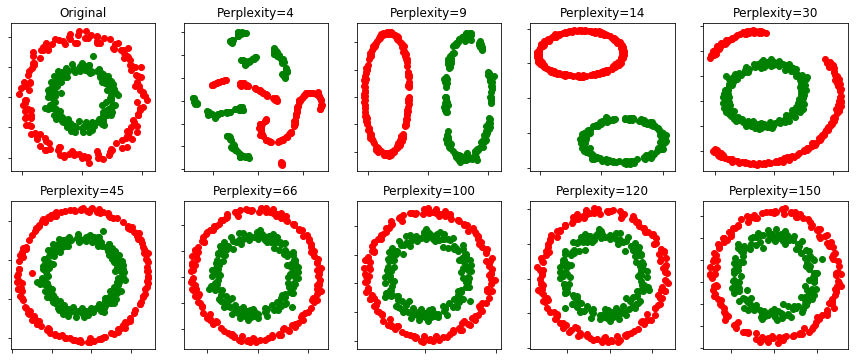

In [2]:
# 設定模型與繪圖參數
n_samples = 300
n_components = 2
(fig, subplots) = plt.subplots(2, 5, figsize=(15, 6))
perplexities = [4, 9, 14, 30, 45, 66, 100, 120, 150]

# 設定同心圓資料點 
X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
red = y == 0 # 將 y 為 0 的 index set 存成變數 red 的 array, shape = (300,), 其中一半 True 一半 False
green = y == 1 # 將 y 為 1 的 index set 存成變數 green 的 array, shape = (300,), 其中一半 True 一半 False

print(f'red.shape={red.shape}, red={red}')

# 繪製資料原圖
ax = subplots[0][0]
ax.set_title("Original")
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[green, 0], X[green, 1], c="g")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


# 繪製不同 perplexity 下的 t-SNE 分群圖
for i, perplexity in enumerate(perplexities):
    if i<4:
        ax = subplots[0][i+1]
    else:
        ax = subplots[1][i-4]

    # n_components: 2 因為只有 2 dimension
    # perplexity: for loop 輸入
    t0 = time()
    tsne_emulator = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    
    # Output predicted result to Y (shape 300x2)
    Y = tsne_emulator.fit_transform(X)
    t1 = time()
    
    print(f"Y.shape={Y.shape}")
    
    # %g (or %e): float
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    
    print(f'Y[red, 0].shape={Y[red, 0].shape}')
    
    # Draw red 的點的座標 (red[n] is True)
    ax.scatter(Y[red, 0], Y[red, 1], c="r")
    # Draw green 的點的座標 (green[n] is True)
    ax.scatter(Y[green, 0], Y[green, 1], c="g")
    
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
    
plt.show()

# 觀察結果
* perplexity 越低時, 圖形越零散, 越高時不僅分群好, 也讓圖形更接近原圖
* 但 perplexity 越高, 執行時間也越久

> Answer: 結果要讓我們看到，原本 red / green 的座標，經過 Transform 後，轉移到哪個位置，位置偏差越大，表示誤判越高

# 作業
* 將原始資料集換為S型圖, 觀察不同 perplexity 下的流形還原結果

In [3]:
a=np.array([1,2,3,4,5,6,7,8,9,10])
b=[True,False,True,False,True,False,True,False,True,False]

a[b]

array([1, 3, 5, 7, 9])